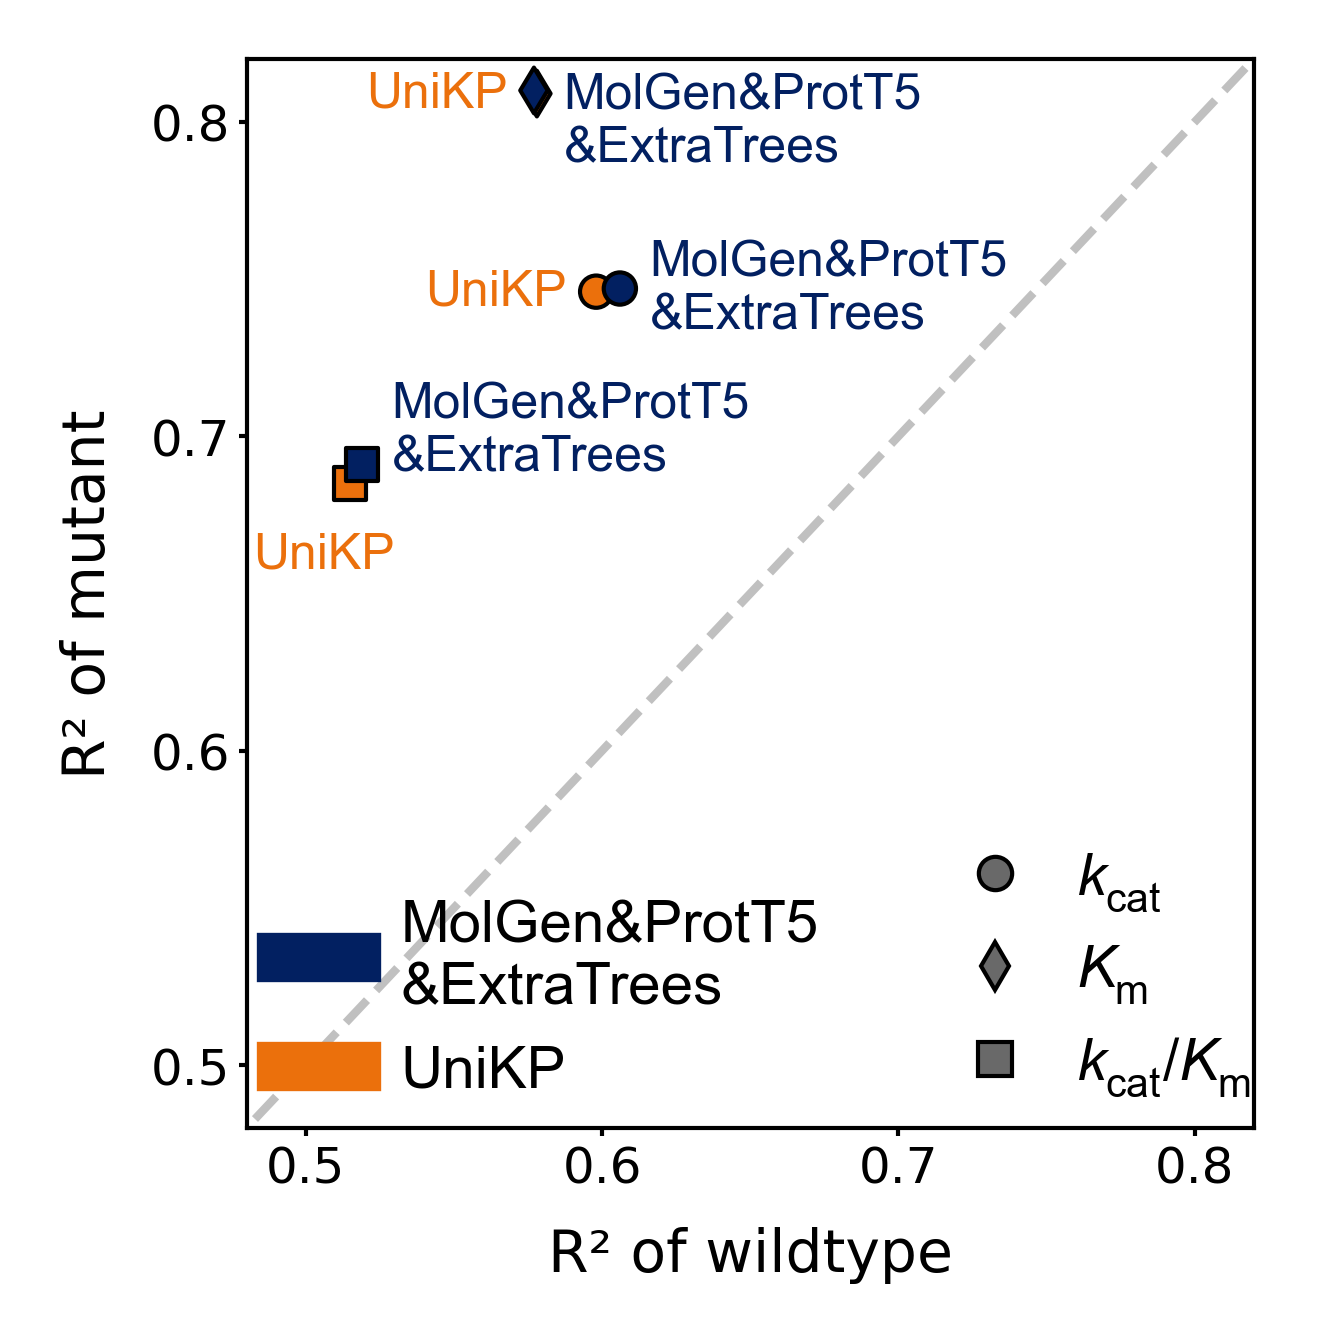

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# --- 1. Data and General Setup ---

# Data points
wildtype_value = [0.598, 0.606, 0.578, 0.577, 0.515, 0.519]
mutant_value = [0.746, 0.747, 0.809, 0.810, 0.685, 0.691]

# Labels for each data point
labels = ['UniKP(kcat)', 'MolGen&ProtT5&ExtraTrees(kcat)', 'UniKP(Km)', 'MolGen&ProtT5&ExtraTrees(Km)', 'UniKP(kcat/km)', 'MolGen&ProtT5&ExtraTrees(kcat/km)']

# Color mapping for each unique model (imitating the example's style)
model_color_map = {
    'UniKP': '#EB700C',         # Using orange from the first example
    'MolGen&ProtT5&ExtraTrees': '#022061'  # Using a distinct dark blue
}

# Helper function to get base model name from a label
def get_base_model(label):
    for model_name in model_color_map:
        if model_name in label:
            return model_name
    return None

# Generate the full color list for all data points based on the model
colors = [model_color_map[get_base_model(label)] for label in labels]

# --- 2. Create Figure and Axes ---
# Use subplots for better control over the figure (fig) and axes (ax)
fig, ax = plt.subplots(1, 1, figsize=(2.2, 2.5), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  # Important: allow custom math fonts
    'mathtext.rm': 'Arial',        # Set Roman font (e.g., for \mathrm)
    'mathtext.it': 'Arial:italic', # Set Italic font (e.g., for \mathit)
    'mathtext.bf': 'Arial:bold',   # Set Bold font (e.g., for \mathbf)
    'pdf.fonttype': 42,            # Ensure fonts are embedded as TrueType for editability in AI
    'ps.fonttype': 42
})

# --- 3. Plot Data and Apply Styles ---

# Plot scatter points for each parameter type with its specific marker
# kcat models (indices 0, 1) use 'o'
ax.scatter(wildtype_value[0:2], mutant_value[0:2], marker='o', color=colors[0:2],
           edgecolor='black', linewidths=0.5, s=15, zorder=2)
# Km models (indices 2, 3) use 'd'
ax.scatter(wildtype_value[2:4], mutant_value[2:4], marker='d', color=colors[2:4],
           edgecolor='black', linewidths=0.5, s=15, zorder=2)
# kcat/Km models (indices 4, 5) use 's'
ax.scatter(wildtype_value[4:6], mutant_value[4:6], marker='s', color=colors[4:6],
           edgecolor='black', linewidths=0.5, s=15, zorder=2)

# Add text labels for each point with manually adjusted positions for clarity
# The text is colored by the model's color, as in the example
ax.text(wildtype_value[0] - 0.01, mutant_value[0], 'UniKP', fontsize=6, color=colors[0], ha='right', va='center')
ax.text(wildtype_value[1] + 0.01, mutant_value[1], 'MolGen&ProtT5\n&ExtraTrees', fontsize=6, color=colors[1], ha='left', va='center')
ax.text(wildtype_value[2] - 0.01, mutant_value[2], 'UniKP', fontsize=6, color=colors[2], ha='right', va='center')
ax.text(wildtype_value[3] + 0.01, mutant_value[3]-0.01, 'MolGen&ProtT5\n&ExtraTrees', fontsize=6, color=colors[3], ha='left', va='center')
ax.text(wildtype_value[4] + 0.015, mutant_value[4]-0.03, 'UniKP', fontsize=6, color=colors[4], ha='right', va='bottom')
ax.text(wildtype_value[5] + 0.01, mutant_value[5]-0.005, 'MolGen&ProtT5\n&ExtraTrees', fontsize=6, color=colors[5], ha='left', va='bottom')

# Apply common styling to the axes
ax.spines['top'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.tick_params(axis='both', direction='out', width=0.5, which='both', length=1, pad=1)

# Set ticks, limits, and labels
ticks = np.arange(0.5, 0.9, 0.1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.tick_params(axis='both', labelsize=6)
ax.set_ylim(0.48, 0.82)
ax.set_xlim(0.48, 0.82)
ax.set_xlabel('R² of wildtype', fontsize=7)
ax.set_ylabel('R² of mutant', fontsize=7)

# Plot y=x line
ax.plot([0, 2], [0, 2], color='silver', linestyle='--', linewidth=1, zorder=1)

# --- 4. Create and Place the Shared Legend ---

# a. Create handles for model colors
long_label_original = 'MolGen&ProtT5&ExtraTrees'
long_label_new = 'MolGen&ProtT5\n&ExtraTrees' # Add a newline character here

color_handles = [
    Patch(color=color, label=long_label_new if name == long_label_original else name)
    for name, color in sorted(model_color_map.items())
]

# b. Create handles for marker shapes (parameter types)
marker_handles = [
    Line2D([0], [0], marker='o', color='w', label=r'$\mathit{k}_\mathrm{cat}$', markersize=4,
           markerfacecolor='dimgray', markeredgecolor='black', markeredgewidth=0.5),
    Line2D([0], [0], marker='d', color='w', label=r'$\mathit{K}_\mathrm{m}$', markersize=4,
           markerfacecolor='dimgray', markeredgecolor='black', markeredgewidth=0.5),
    Line2D([0], [0], marker='s', color='w', label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$', markersize=4,
           markerfacecolor='dimgray', markeredgecolor='black', markeredgewidth=0.5)
]

# c. Combine all handles and create the figure-level legend
# all_handles = color_handles + marker_handles
fig.legend(handles=color_handles,
           loc='lower left',         # Position below the plot
           bbox_to_anchor=(0.16, 0.23), # Fine-tune the position
           ncol=1,                     # Arrange all items in a single column
           frameon=False,
           fontsize=7,
           columnspacing=1.5,          # Adjust spacing between columns
           handletextpad=0.4)          # Adjust spacing between handle and text
fig.legend(handles=marker_handles,
           loc='lower right',         # Position below the plot
           bbox_to_anchor=(0.99, 0.23), # Fine-tune the position
           ncol=1,                     # Arrange all items in a single column
           frameon=False,
           fontsize=7,
           columnspacing=1.5,          # Adjust spacing between columns
           handletextpad=0.4)          # Adjust spacing between handle and text
# --- 5. Final Adjustments and Saving ---
# Adjust layout to prevent title/label overlap and make space for the legend
fig.tight_layout(rect=[0, 0.1, 1, 1]) # rect=[left, bottom, right, top]

# Save and show the figure
plt.savefig('./pdf/fig4A.pdf', dpi=600, bbox_inches='tight')
plt.show()

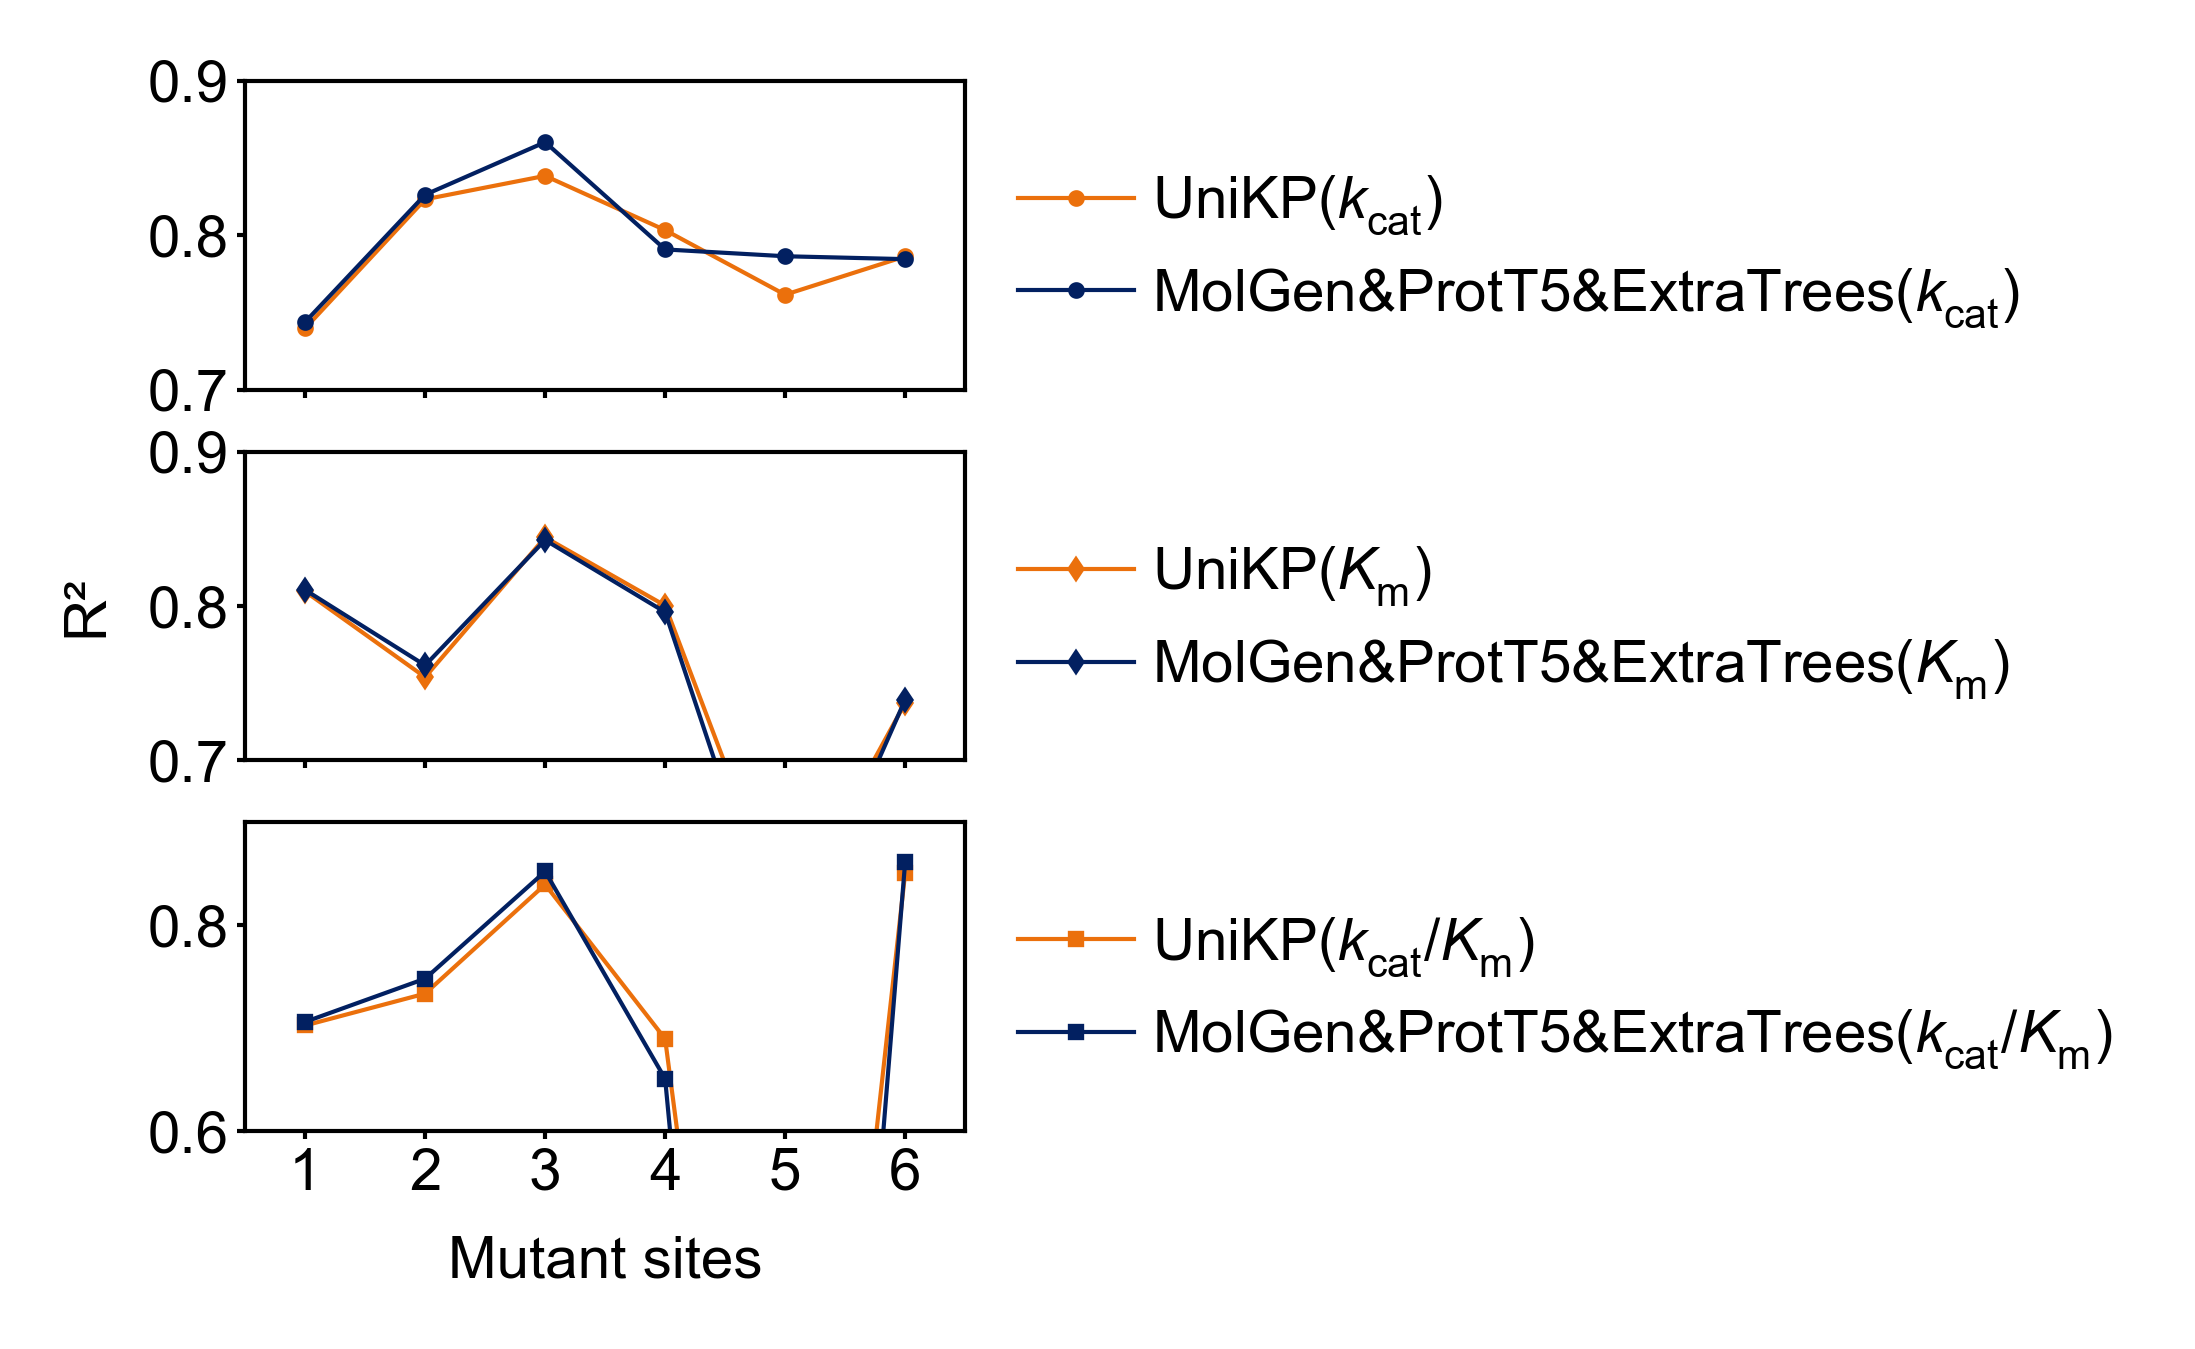

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed to ensure consistent results on each run
np.random.seed(42)

#!###########################################################################################################################################################################
# Data for the plots
result1 = {
    r'UniKP($\mathit{k}_\mathrm{cat}$)': [0.739842, 0.823378, 0.838567, 0.803421, 0.761602, 0.786388],
    r'MolGen&ProtT5&ExtraTrees($\mathit{k}_\mathrm{cat}$)': [0.743927, 0.826340, 0.860393, 0.790920, 0.786507, 0.784638],
}
result2 = {
    r'UniKP($\mathit{K}_\mathrm{m}$)': [0.809419, 0.753909, 0.844455, 0.800272, 0.595220, 0.737153],
    r'MolGen&ProtT5&ExtraTrees($\mathit{K}_\mathrm{m}$)': [0.810400, 0.761573, 0.842724, 0.796045, 0.563083, 0.739276],
}
result3 = {
    r'UniKP($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)': [0.702490, 0.733477, 0.839464, 0.689502, -0.199419, 0.850427],
    r'MolGen&ProtT5&ExtraTrees($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)': [0.705991, 0.747983, 0.852102, 0.650745, -0.577942, 0.861026],
}
#!###########################################################################################################################################################################
# Create a 3-row, 1-column subplot layout
fig, axes = plt.subplots(3, 1, figsize=(1.5, 2.5), dpi=600)
# Update font size and font family
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  # Important: Allow custom math fonts
    'mathtext.rm': 'Arial',        # Set Roman font (e.g., for \mathrm)
    'mathtext.it': 'Arial:italic', # Set Italic font (e.g., for \mathit)
    'mathtext.bf': 'Arial:bold',   # Set Bold font (e.g., for \mathbf)
    'pdf.fonttype': 42,            # Ensure fonts are embedded as TrueType for editability in AI
    'ps.fonttype': 42
})
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.85)

# Iterate through each subplot and set the axis styles
for ax in axes:
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    # ax.set_aspect('equal', adjustable='box')

# Subplot 1: Plot result1 data
# Set colors and marker styles
colors = ['#EB700C','#022061']
markers = ['o', 'o', 'o', 'o', 'o', 'o']
x_pos = range(1, 7)
for idx, (label, data) in enumerate(result1.items()):
    axes[0].plot(x_pos, data,
                 marker=markers[idx],
                 color=colors[idx],
                 markersize=1,
                 linestyle='-',
                 linewidth=0.5,
                 markerfacecolor=colors[idx],
                 markeredgecolor=colors[idx],
                 label=label)
# axes[0].set_ylabel('R2', fontsize=8)
axes[0].set_ylim(0.7, 0.9)
axes[0].set_xlim(0.5, 6.5)
axes[0].set_xticks([1,2,3,4,5,6])
axes[0].set_xticklabels(['','','','','',''],fontsize=6)
axes[0].tick_params(axis='x', direction='out', width=0.5, which='both', length=1, pad=1)
axes[0].tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=1)
axes[0].legend(frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(1, 0.87), ncol=1, labelspacing=0.5, handletextpad=0.3)

# Subplot 2: Plot result2 data
# Set colors and marker styles
colors = ['#EB700C','#022061']
markers = ['d', 'd', 'd', 'd', 'd', 'd']
for idx, (label, data) in enumerate(result2.items()):
    axes[1].plot(x_pos, data,
                 marker=markers[idx],
                 color=colors[idx],
                 markersize=1,
                 linestyle='-',
                 linewidth=0.5,
                 markerfacecolor=colors[idx],
                 markeredgecolor=colors[idx],
                 label=label)
axes[1].set_ylabel('R²', fontsize=7)
axes[1].set_ylim(0.7, 0.9)
axes[1].set_xlim(0.5, 6.5)
axes[1].set_xticks([1,2,3,4,5,6],['','','','','',''],fontsize=6)
axes[1].tick_params(axis='x', direction='out', width=0.5, which='both', length=1, pad=1)
axes[1].tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=1)
axes[1].legend(frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(1, 0.87), ncol=1, labelspacing=0.5, handletextpad=0.3)

# Subplot 3: Plot result3 data
# Set colors and marker styles
colors = ['#EB700C','#022061']
markers = ['s', 's', 's', 's', 's', 's']
for idx, (label, data) in enumerate(result3.items()):
    axes[2].plot(x_pos, data,
                 marker=markers[idx],
                 color=colors[idx],
                 markersize=1,
                 linestyle='-',
                 linewidth=0.5,
                 markerfacecolor=colors[idx],
                 markeredgecolor=colors[idx],
                 label=label)
axes[2].set_xlabel('Mutant sites', fontsize=7)
axes[2].set_ylim(0.6, 0.9)
axes[2].set_xlim(0.5, 6.5)
axes[2].set_xticks([1, 2, 3, 4, 5, 6])
axes[2].set_xticklabels([1,2,3,4,5,6],fontsize=7)
axes[2].tick_params(axis='x', direction='out', width=0.5, which='both', length=1, pad=1)
axes[2].tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=1)
axes[2].legend(frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(1, 0.87), ncol=1, labelspacing=0.5, handletextpad=0.3)

# Adjust the spacing between subplots
plt.savefig('./pdf/fig4B.pdf',dpi=600, bbox_inches='tight')
# Display the plot
plt.show()